<a href="https://colab.research.google.com/github/realcommang/BigDataProcess/blob/main/%EC%8B%A4%EC%8A%B5%EA%B3%BC%EC%A0%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

epoch=0, 기울기=0.0143, 절편=-0.0036
Error value: 0.2488
epoch=1000, 기울기=0.2108, 절편=-1.9640
Error value: 0.2004
epoch=2000, 기울기=0.2412, 절편=-2.2687
Error value: 0.2004
epoch=3000, 기울기=0.2471, 절편=-2.3286
Error value: 0.2005
epoch=4000, 기울기=0.2485, 절편=-2.3422
Error value: 0.2006
epoch=5000, 기울기=0.2489, 절편=-2.3462
Error value: 0.2006
epoch=6000, 기울기=0.2490, 절편=-2.3474
Error value: 0.2006
epoch=7000, 기울기=0.2490, 절편=-2.3477
Error value: 0.2006
epoch=8000, 기울기=0.2490, 절편=-2.3478
Error value: 0.2006
epoch=9000, 기울기=0.2490, 절편=-2.3478
Error value: 0.2006
epoch=10000, 기울기=0.2490, 절편=-2.3478
Error value: 0.2006


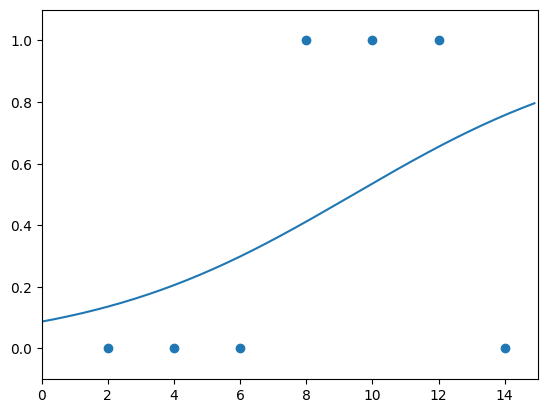

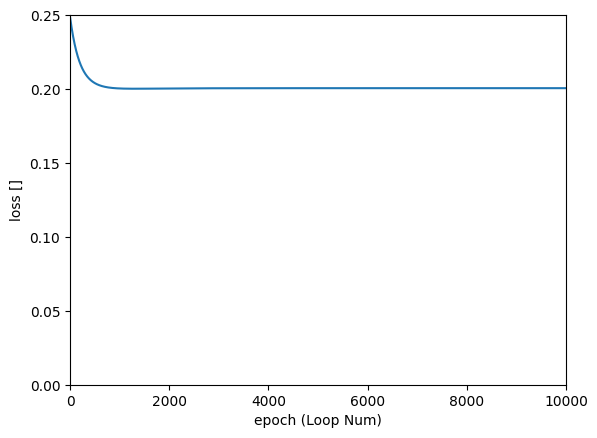

Input: 2.0, Real: 0.0, Expect: 0.1359
Input: 4.0, Real: 0.0, Expect: 0.2056
Input: 6.0, Real: 0.0, Expect: 0.2987
Input: 8.0, Real: 1.0, Expect: 0.4120
Input: 10.0, Real: 1.0, Expect: 0.5356
Input: 12.0, Real: 1.0, Expect: 0.6549
Input: 14.0, Real: 0.0, Expect: 0.7574


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#[14.0, 1.0] -> [14.0, 0.0]
data = [[2.0, 0.0], [4.0, 0.0], [6.0, 0.0], [8.0, 1.0], [10.0, 1.0], [12.0, 1.0], [14.0, 0.0]]
a = 0
b = 0
lr = 0.05

def sigmoid(x):
  return 1 / (1 + np.e ** (-x))

x = [i[0] for i in data]
y = [i[1] for i in data]

x_data = np.array(x)
y_data = np.array(y)

#제곱 평균(Mse) 계산
def error_sum():
  sum = ((y_data - sigmoid(a * x_data + b)) ** 2)
  return np.mean(sum)

loss = []
error = error_sum()

for i in range(10001):

    a_diff = (1/len(x_data))*sum(x_data*(sigmoid(a * x_data + b) - y_data))
    b_diff = (1/len(x_data))*sum(sigmoid(a * x_data + b) - y_data)

    a = a - lr * a_diff
    b = b - lr * b_diff
    error_1 = error_sum()

    loss.append(error_1)

    if round(error_1,3) > round(error,3) :
      lr = lr - 0.01

    if i % 1000 == 0:
      print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
      print("Error value: %.04f" %(error_1))

    error = error_1

plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range0 = (np.arange(0, 15, 0.1))
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a*x + b) for x in x_range0]))
plt.show()

plt.xlim(0 ,10000)
plt.ylim(0.000, 0.250)
plt.xlabel('epoch (Loop Num)')
plt.ylabel('loss []')
x_range = (np.arange(0, 10000, 1))
plt.plot(np.arange(0, 10000, 1), np.array([loss[x] for x in x_range]))
plt.show()

for i, j in zip(x_data, y_data):
  print("Input: %.1f, Real: %.1f, Expect: %.4f" % (i, j, sigmoid(a*i+b)))
